# Assignment 2

In this assignment the goal is to be able to price a game based on an image. This will be done using a convolutional neural network. In what follows we first performed some ...

To Do:
- Do a round of fine-tuning of the entire model
- Add a base-line
    take the average from the training data and use it on the validation data, we want to improve this with our model


## Train, validation, test split and data pre-processing

The first step requires loading in the images and the json file that includes the price for each game and the corresponding screenshots. <br> <br>


In [33]:
#Load the following packages:
import os
import json
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
import tensorflow
from sklearn.model_selection import train_test_split

# Set the location of where the images are stored. Adjust if necessary
image_location = '/Users/sarahguilliams/Desktop/Advanced Analytics in a Big Data World/Assignment2/images'

# Load the json datafile
file_path = "dataset.json"

# Open the JSON file and load its contents
with open(file_path, 'r') as file:
    data = json.load(file)
data1 = pd.DataFrame(data)



A key aspect of this assignment was accounting for the fact that a game can have multiple images. Therefore, when the training, validation, test split was made, this was done based on the games instead of on the seperate images. For this model the decision was made to split our data 60/20/20. 


In [34]:
# Select 10% of the games
num_selected_games = int(len(data1) * 0.5)
np.random.seed(0) #This is so that we get the same games when training the model.
selected_games = data1.sample(n=num_selected_games)
print(selected_games) # selected 1468 games

         appid     release                                title  price  \
14542  2203540  2023-01-06       Escape From School : F.E.L.I.K    399   
2007   2747740  2024-01-25               Nova Hearts: The Spark      0   
14202  2263550  2023-01-20                      Touch the Color      0   
6681   2562290  2023-09-19                              Penrose    499   
12942  2299920  2023-03-03                           CARTOONITE    499   
...        ...         ...                                  ...    ...   
7829   1983970  2023-08-17                             Affogato   1649   
12674  1839610  2023-03-13                           Hammer Kid      0   
14117  2245670  2023-01-24  Stella's Pointless Castle Awakening   1950   
14056  2070410  2023-01-26                           Flightpath    975   
1322   2829240  2024-02-27                              HOP TOP    499   

             sentiment reviews percentage  \
14542             None    None        NaN   
2007          Positiv

In [18]:
selected_games['price']

14542     399
2007        0
14202       0
6681      499
12942     499
         ... 
7829     1649
12674       0
14117    1950
14056     975
1322      499
Name: price, Length: 7343, dtype: int64

In [35]:
#train_games['screenshots'] = train_games['screenshots'].apply(lambda x: x.split(','))

#max_screenshots = train_games['screenshots'].apply(len).max()


screenshots_new = selected_games['screenshots'].apply(pd.Series)
screenshots_new.head()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
14542,2203540_ss_00e237a17c29f0b3f535be5bbaf1aca1291...,2203540_ss_1a1c09618fa769453a86ec361523bb56c87...,2203540_ss_2a7f60e28946eeba3f693cfbbcd911ce86f...,2203540_ss_4bfd302dbed6cf7ea5918f0fc9889a4dfce...,2203540_ss_57481680e8c02e3dc6bc269e5543c36f407...,2203540_ss_612dab69a97e6bc5e9e4e7a53b970248dbb...,2203540_ss_668b84bb5c268642426a986130de57492e6...,2203540_ss_773a259226938c797b7e2702c20a528844b...,2203540_ss_80e1925f5f07f07a88346d7b2bc898da97b...,2203540_ss_bd0722a3320e860f06ee6b275693fc0044a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,2747740_ss_2680d60077208ff4397d1d6109eee41e4f7...,2747740_ss_391fdbf16da101beb045a88c28e038e0dc3...,2747740_ss_3e21413e0407fc7a35f74faa17273690b10...,2747740_ss_745066e53a1d198e533cde89f6a88de086c...,2747740_ss_8b4f0e299eeb011616fcac9fb3ef58761b8...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14202,2263550_ss_003ae84254705fc2976b3302a9a7cad59d3...,2263550_ss_4ba42c4d41d345ce4ad54cdbaac74da3487...,2263550_ss_55e8ffdfcac29d51e3477f128d04d5023e4...,2263550_ss_9e6120400646fc8c47512afd49979b3a92e...,2263550_ss_f62c53d9cd31ca9c6599b9e50a37b86160b...,2263550_ss_fdd57a121c4bbd350261606d180f1a88221...,2263550_ss_fdda3138cd0172a67bd0533652384f4a16b...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6681,2562290_ss_1279e5037cd663de37348356a3e0f49b230...,2562290_ss_192326a1b1396941cef092ecdf82103a1ba...,2562290_ss_432ad434f4bf03ffb95d05e0affec1fc5d2...,2562290_ss_73fefb1fa059409880d1f416508a224dced...,2562290_ss_d8c9e249d251b5fb93f13f818b212074731...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12942,2299920_ss_068a09669ef97ddb9c79c2ca29ef7945dcc...,2299920_ss_0a3f51dc8d1387c051bb0b6239ec3ee2ac2...,2299920_ss_0ac1e97493ca3283d73e36bb9f00115c6d9...,2299920_ss_23e3a1de35a8378e3e2cbddb8cf74b137e1...,2299920_ss_33d9b7158ba8ae1019de2bd2277f147ab00...,2299920_ss_3740347ab51dbaf23e954b25bc860566d8e...,2299920_ss_645d176075ee0ffc545f23adc5e31ca4948...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:

# Function to replace NaN values with a random non-NaN value from previous columns
def replace_nan_with_random(df):
    for index, row in df.iterrows():
        for col_index, value in row.items():
            if pd.isnull(value):
                # Get previous non-NaN values in the row
                previous_values = row[:col_index][::-1]
                previous_values = previous_values.dropna()
                
                if not previous_values.empty:
                    # Select a random non-NaN value from previous columns
                    random_value = previous_values.sample().iloc[0]
                    # Replace NaN with the randomly selected value
                    df.at[index, col_index] = random_value

# Call the function to replace NaN values with random non-NaN values
replace_nan_with_random(screenshots_new)

In [37]:
screenshots_new.head()
result_df = pd.concat([selected_games['price'], screenshots_new], axis=1)
result_df.head()

,price,0,1,2,3,4,5,6,7,8,...,75,76,77,78,79,80,81,82,83,84
14542,399,2203540_ss_00e237a17c29f0b3f535be5bbaf1aca1291...,2203540_ss_1a1c09618fa769453a86ec361523bb56c87...,2203540_ss_2a7f60e28946eeba3f693cfbbcd911ce86f...,2203540_ss_4bfd302dbed6cf7ea5918f0fc9889a4dfce...,2203540_ss_57481680e8c02e3dc6bc269e5543c36f407...,2203540_ss_612dab69a97e6bc5e9e4e7a53b970248dbb...,2203540_ss_668b84bb5c268642426a986130de57492e6...,2203540_ss_773a259226938c797b7e2702c20a528844b...,2203540_ss_80e1925f5f07f07a88346d7b2bc898da97b...,...,2203540_ss_612dab69a97e6bc5e9e4e7a53b970248dbb...,2203540_ss_00e237a17c29f0b3f535be5bbaf1aca1291...,2203540_ss_4bfd302dbed6cf7ea5918f0fc9889a4dfce...,2203540_ss_bd0722a3320e860f06ee6b275693fc0044a...,2203540_ss_773a259226938c797b7e2702c20a528844b...,2203540_ss_612dab69a97e6bc5e9e4e7a53b970248dbb...,2203540_ss_c074e9af7bf728eb686ef276e4ec251f95a...,2203540_ss_00e237a17c29f0b3f535be5bbaf1aca1291...,2203540_ss_00e237a17c29f0b3f535be5bbaf1aca1291...,2203540_ss_00e237a17c29f0b3f535be5bbaf1aca1291...
2007,0,2747740_ss_2680d60077208ff4397d1d6109eee41e4f7...,2747740_ss_391fdbf16da101beb045a88c28e038e0dc3...,2747740_ss_3e21413e0407fc7a35f74faa17273690b10...,2747740_ss_745066e53a1d198e533cde89f6a88de086c...,2747740_ss_8b4f0e299eeb011616fcac9fb3ef58761b8...,2747740_ss_2680d60077208ff4397d1d6109eee41e4f7...,2747740_ss_8b4f0e299eeb011616fcac9fb3ef58761b8...,2747740_ss_8b4f0e299eeb011616fcac9fb3ef58761b8...,2747740_ss_8b4f0e299eeb011616fcac9fb3ef58761b8...,...,2747740_ss_2680d60077208ff4397d1d6109eee41e4f7...,2747740_ss_8b4f0e299eeb011616fcac9fb3ef58761b8...,2747740_ss_391fdbf16da101beb045a88c28e038e0dc3...,2747740_ss_2680d60077208ff4397d1d6109eee41e4f7...,2747740_ss_8b4f0e299eeb011616fcac9fb3ef58761b8...,2747740_ss_391fdbf16da101beb045a88c28e038e0dc3...,2747740_ss_8b4f0e299eeb011616fcac9fb3ef58761b8...,2747740_ss_2680d60077208ff4397d1d6109eee41e4f7...,2747740_ss_8b4f0e299eeb011616fcac9fb3ef58761b8...,2747740_ss_2680d60077208ff4397d1d6109eee41e4f7...
14202,0,2263550_ss_003ae84254705fc2976b3302a9a7cad59d3...,2263550_ss_4ba42c4d41d345ce4ad54cdbaac74da3487...,2263550_ss_55e8ffdfcac29d51e3477f128d04d5023e4...,2263550_ss_9e6120400646fc8c47512afd49979b3a92e...,2263550_ss_f62c53d9cd31ca9c6599b9e50a37b86160b...,2263550_ss_fdd57a121c4bbd350261606d180f1a88221...,2263550_ss_fdda3138cd0172a67bd0533652384f4a16b...,2263550_ss_fdda3138cd0172a67bd0533652384f4a16b...,2263550_ss_fdda3138cd0172a67bd0533652384f4a16b...,...,2263550_ss_fdda3138cd0172a67bd0533652384f4a16b...,2263550_ss_fdd57a121c4bbd350261606d180f1a88221...,2263550_ss_fdd57a121c4bbd350261606d180f1a88221...,2263550_ss_55e8ffdfcac29d51e3477f128d04d5023e4...,2263550_ss_9e6120400646fc8c47512afd49979b3a92e...,2263550_ss_f62c53d9cd31ca9c6599b9e50a37b86160b...,2263550_ss_55e8ffdfcac29d51e3477f128d04d5023e4...,2263550_ss_9e6120400646fc8c47512afd49979b3a92e...,2263550_ss_55e8ffdfcac29d51e3477f128d04d5023e4...,2263550_ss_f62c53d9cd31ca9c6599b9e50a37b86160b...
6681,499,2562290_ss_1279e5037cd663de37348356a3e0f49b230...,2562290_ss_192326a1b1396941cef092ecdf82103a1ba...,2562290_ss_432ad434f4bf03ffb95d05e0affec1fc5d2...,2562290_ss_73fefb1fa059409880d1f416508a224dced...,2562290_ss_d8c9e249d251b5fb93f13f818b212074731...,2562290_ss_73fefb1fa059409880d1f416508a224dced...,2562290_ss_432ad434f4bf03ffb95d05e0affec1fc5d2...,2562290_ss_432ad434f4bf03ffb95d05e0affec1fc5d2...,2562290_ss_432ad434f4bf03ffb95d05e0affec1fc5d2...,...,2562290_ss_432ad434f4bf03ffb95d05e0affec1fc5d2...,2562290_ss_d8c9e249d251b5fb93f13f818b212074731...,2562290_ss_432ad434f4bf03ffb95d05e0affec1fc5d2...,2562290_ss_1279e5037cd663de37348356a3e0f49b230...,2562290_ss_432ad434f4bf03ffb95d05e0affec1fc5d2...,2562290_ss_1279e5037cd663de37348356a3e0f49b230...,2562290_ss_1279e5037cd663de37348356a3e0f49b230...,2562290_ss_432ad434f4bf03ffb95d05e0affec1fc5d2...,2562290_ss_1279e5037cd663de37348356a3e0f49b230...,2562290_ss_1279e5037cd663de37348356a3e0f49b230...
12942,499,2299920_ss_068a09669ef97ddb9c79c2ca29ef7945dcc...,2299920_ss_0a3f51dc8d1387c051bb

In [38]:
# Split data into training and validation sets based on games
train1_games, test_games = train_test_split(result_df, test_size=0.2, random_state=42)
train_games, val_games = train_test_split(train1_games, test_size=0.25, random_state=42) # 0.25 * 0.8 = 0.2
#train_games.head()


In [39]:
input_imgen = tensorflow.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2,
                                   rotation_range=5.,
                                   horizontal_flip = True)

test_imgen = tensorflow.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [57]:


def generate_generator_multiple(generator, batch_size, img_height,img_width):
    genX1 = generator.flow_from_dataframe(dataframe=train_games, directory=image_location, color_mode= "rgb",
                                          target_size = (224,224),
                                          x_col="s_1", y_col="price", has_ext=True, 
                                          class_mode="other",
                                          batch_size = batch_size,
                                          shuffle=False, 
                                          seed=7)
    
    genX2 = generator.flow_from_dataframe(dataframe=train_games, directory=image_location, color_mode= "rgb",
                                          target_size = (224,224),
                                          x_col="s_2", y_col="price", has_ext=True, 
                                          class_mode="other",
                                          batch_size = batch_size,
                                          shuffle=False, 
                                          seed=7)
    while True:
            X1i = genX1.next()
            X2i = genX2.next()
            yield [X1i[0], X2i[0]], X2i[1]  #Yield both images and their mutual label



                                              

In [40]:
# trying to extend it to 20 columns
img_height = 224
img_width = 224
batch_size = 32
def generate_generator_multiple(generator, dataframe, batch_size, img_height, img_width, num_columns=8):
    generators = []
    
    for i in range(num_columns):
        genX = generator.flow_from_dataframe(dataframe=dataframe, directory=image_location, color_mode="rgb",
                                             target_size=(img_height, img_width),
                                             x_col=i, y_col="price", has_ext=True,
                                             class_mode="other",
                                             batch_size=batch_size,
                                             shuffle=False,
                                             seed=7)
        generators.append(genX)
       

    while True:
        batch_X = []
        batch_Y = None
        
        for genX in generators:
            X, Y = genX.next()
            batch_X.append(X)
            if batch_Y is None:
                batch_Y = Y
        
        yield batch_X, batch_Y

In [41]:
inputgenerator=generate_generator_multiple(generator=input_imgen, dataframe=train_games,
                                           batch_size=batch_size,
                                           img_height=img_height,
                                           img_width=img_width)       

valgenerator=generate_generator_multiple(test_imgen, dataframe=val_games,
                                          batch_size=batch_size,
                                          img_height=img_height,
                                          img_width=img_width)   
     
testgenerator=generate_generator_multiple(test_imgen, dataframe=test_games,
                                          batch_size=batch_size,
                                          img_height=img_height,
                                          img_width=img_width)    


In [42]:
from tensorflow.keras.layers import Input, Concatenate, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model


input_x_1 = Input(shape=(224, 224, 3), name='input_1')
input_x_2 = Input(shape=(224, 224, 3), name='input_2')
input_x_3 = Input(shape=(224, 224, 3), name='input_3')
input_x_4 = Input(shape=(224, 224, 3), name='input_4')
input_x_5 = Input(shape=(224, 224, 3), name='input_5')
input_x_6 = Input(shape=(224, 224, 3), name='input_6')
input_x_7 = Input(shape=(224, 224, 3), name='input_7')
input_x_8 = Input(shape=(224, 224, 3), name='input_8')

#Shared layer
base_model = EfficientNetB0(
    include_top=False, #Do not use the imagenet at the top
    weights="imagenet",
    pooling=None,
)
base_model.trainable = False


x1 = base_model(input_x_1, training=False)
x2 = base_model(input_x_2, training=False)
x3 = base_model(input_x_3, training=False)
x4 = base_model(input_x_4, training=False)
x5 = base_model(input_x_5, training=False)
x6 = base_model(input_x_6, training=False)
x7 = base_model(input_x_7, training=False)
x8 = base_model(input_x_8, training=False)

x = Concatenate()([x1, x2, x3, x4, x5, x6, x7, x8])

x = GlobalAveragePooling2D(name="avg_pool")(x)
x = BatchNormalization()(x)
x = Dropout(0.2, name="top_dropout")(x)
output = Dense(1, activation = "exponential", name="prediction")(x)

model = Model(inputs= [input_x_1, input_x_2, input_x_3, input_x_4, input_x_5, input_x_6, input_x_7, input_x_8], outputs= output)


In [12]:
from keras.utils import plot_model
import pydot
#plot_model(model, "multi_input_and_output_model_8 _input.png", show_shapes=True)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                            

In [43]:
# Adding cyclical learning rate
from keras.callbacks import *
from clr_callback import CyclicLR
from keras.optimizers import Adam, SGD

#set the CLR options
clr_step_size = int(4 * (len(train_games)/64)) #see paper https://arxiv.org/pdf/1506.01186
base_lr = 1e-7
max_lr = 1e-2
mode='triangular'


# You are using the triangular learning rate policy and
#  base_lr (initial learning rate which is the lower boundary in the cycle) is 0.1
clr_triangular = CyclicLR(base_lr=base_lr, max_lr=max_lr, step_size=clr_step_size, mode=mode)
opt = Adam(0.001)

# Adding an early stopping mechanism
EarlyStoppinng = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=2,
    verbose=1,
    start_from_epoch=2,
)

model.compile(optimizer=opt, loss='mean_squared_error', metrics=[keras.metrics.MeanAbsoluteError()])
print("Model is compiled")
# Loss function: the parameter that is used to optimize the model, i.e. the loss function is minimized by the model
# Metric: what is used to evaluate the model performance (this can be used to compare different models)



Model is compiled


In [31]:
steps = len(train_games)//64
steps

68

In [44]:
steps = len(train_games)//batch_size

# Fitting the model
# fit the model
history = model.fit(
    inputgenerator,
    steps_per_epoch=steps,
    epochs=1,
    validation_data=valgenerator,
    validation_steps = len(val_games)//batch_size
)


Found 4405 validated image filenames.
Found 4405 validated image filenames.
Found 4405 validated image filenames.
Found 4405 validated image filenames.
Found 4405 validated image filenames.
Found 4405 validated image filenames.
Found 4405 validated image filenames.
Found 4405 validated image filenames.


2024-05-02 13:33:40.505236: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


137/137 [==============================] - ETA: 0s - loss: 52778644.0000 - mean_absolute_error: 1143.1519Found 1469 validated image filenames.
Found 1469 validated image filenames.
Found 1469 validated image filenames.
Found 1469 validated image filenames.
Found 1469 validated image filenames.
Found 1469 validated image filenames.
Found 1469 validated image filenames.
Found 1469 validated image filenames.


2024-05-02 13:49:14.241010: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


137/137 [==============================] - 1194s 9s/step - loss: 52778644.0000 - mean_absolute_error: 1143.1519 - val_loss: 148869056.0000 - val_mean_absolute_error: 1601.3036


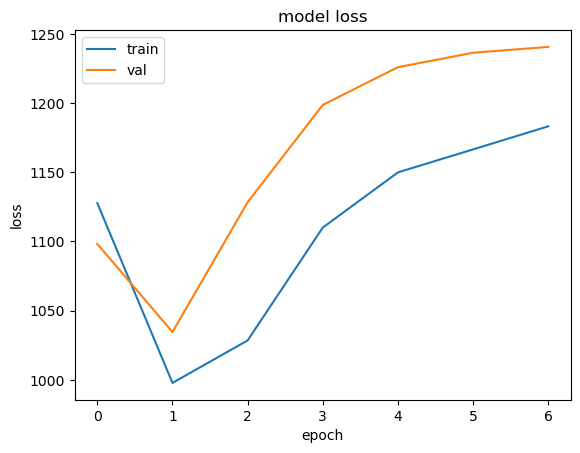

In [25]:
# Plotting the error
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [35]:
# Evaluate model
loss, mean_absolute_error = model.evaluate(testgenerator, steps=len(test_games)//64)


Found 2938 validated image filenames.
Found 2938 validated image filenames.
Found 2938 validated image filenames.
Found 2938 validated image filenames.
Found 2938 validated image filenames.
Found 2938 validated image filenames.
Found 2938 validated image filenames.
Found 2938 validated image filenames.


2024-05-02 10:01:34.165182: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


45/45 [==============================] - 594s 13s/step - loss: 118920328.0000 - mean_absolute_error: 1491.9241


In [36]:
print("Test MAE:", mean_absolute_error)

Test MAE: 1491.924072265625


In [38]:
test_games['price'].head(20)

5599      589
10799     199
172         0
2282      689
12737     975
1019      975
1555      975
1034       99
9584      779
5878      975
6692       99
2184      589
1093      599
2783       99
10030    1479
12390       0
3708     1999
9983     1479
7027      299
9602      499
Name: price, dtype: int64

In [45]:
pred = []

for i in range(len(test_games)):

    image_paths = [os.path.join(image_location, filename) for filename in test_games.iloc[i, 1:9]]  # Assuming columns "0" to "8" contain the image filenames
    images = [keras.utils.load_img(image_path, target_size=(224, 224)) for image_path in image_paths]
    img_arrays = [keras.utils.img_to_array(img) for img in images]
    img_arrays = [tensorflow.expand_dims(img_array, 0) for img_array in img_arrays]  # Create batch axis for each image


    predictions = model.predict(img_arrays)
    pred.append({'price': predictions[0][0]})
    print('difference ', i , predictions[0][0] - test_games.iloc[i]["price"])

predictions_test = pd.DataFrame(pred)
predictions_test.head()

1/1 [==============================] - 5s 5s/step
difference  0 -498.9956181864254
1/1 [==============================] - 0s 102ms/step
difference  1 -1848.9994679487427
1/1 [==============================] - 0s 104ms/step
difference  2 -1898.9994832915836
1/1 [==============================] - 0s 103ms/step
difference  3 -498.99970493812
1/1 [==============================] - 0s 104ms/step
difference  4 -974.9999473743228
1/1 [==============================] - 0s 107ms/step
difference  5 -974.9988177749328
1/1 [==============================] - 0s 112ms/step
difference  6 -688.9997989703697
1/1 [==============================] - 0s 110ms/step
difference  7 -658.9999227195876
1/1 [==============================] - 0s 101ms/step
difference  8 -2449.999998633032
1/1 [==============================] - 0s 96ms/step
difference  9 -778.9999819968525
1/1 [==============================] - 0s 101ms/step
difference  10 -398.9919494073838
1/1 [==============================] - 0s 102ms/step
diff

,price
0,0.004382
1,0.000532
2,0.000517
3,0.000295
4,0.000053


In [46]:
print(min(predictions_test['price']))
print(max(predictions_test['price']))

6.8135812547609476e-09
68.43549346923828


Text(0.5, 0, 'Actual')

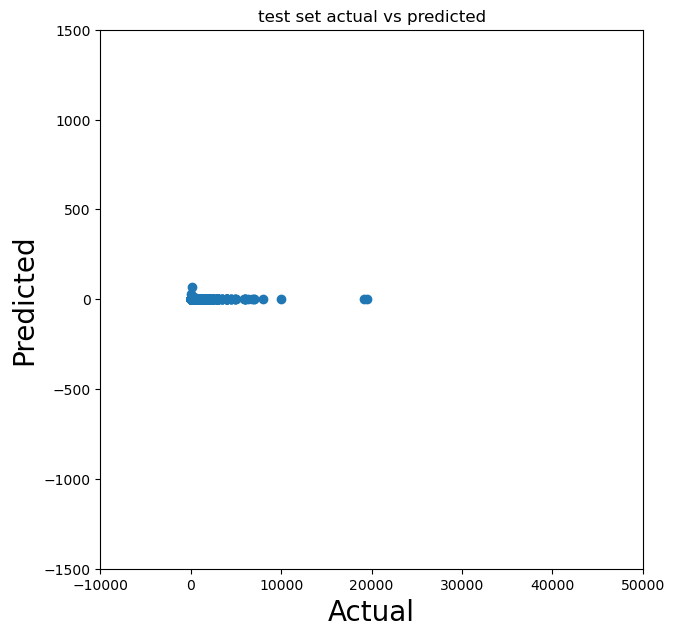

In [47]:
plt.figure(figsize = (7,7))
plt.axis([-10000, 50000, -1500, 1500])
plt.scatter(test_games['price'], predictions_test['price'])
#plt.plot([min(test_games['price']), max(test_games['price'])], [min(test_games['price']), max(test_games['price'])], color="r", linestyle="-", linewidth=2)
#plt.plot([min(test_games['price']), max(test_games['price'])], [min(test_games['price']), max(test_games['price'])], color="r", linestyle="-", linewidth=2)
plt.title("test set actual vs predicted")
plt.ylabel("Predicted", size=20)
plt.xlabel("Actual", size=20)

In [71]:
# Assuming `model` is your Keras model containing tensors
# Convert the tensors to NumPy arrays
model_weights = [layer.numpy() for layer in model.weights]
tensorflow.keras.models.save_model(model, "my_model_multiple_images.h5")

TypeError: Unable to serialize [2.0896919 2.1128857 2.1081853] to JSON. Unrecognized type <class 'tensorflow.python.framework.ops.EagerTensor'>.

In [65]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                            

Give the predicted price for a game


2703240_ss_b09a37f8a0d9a8a1844fc018826f276cb50c58a3.1920x1080.jpg


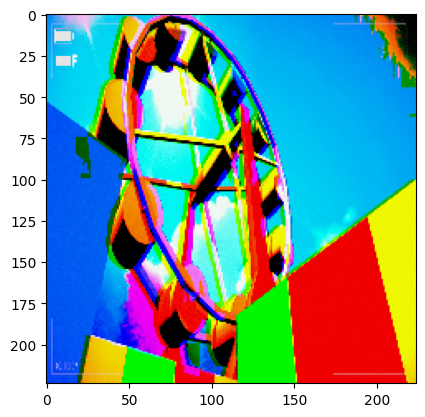

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[534.8773]]
58500


In [95]:
# Define the image location
number = 100
print(test_label_df.loc[number, "screenshot"])
filename = test_label_df.loc[number, "screenshot"]
#'620620_ss_01fe128c1e30f3cc9cee30fa4bbdb7f60e9abe67.1920x1080.jpg'

# Construct the full path to the image
image_path = os.path.join(image_location, filename)

# Load and display the image
img = keras.utils.load_img(image_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

img_array = keras.utils.img_to_array(img)
img_array = keras.ops.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
print(predictions)
print(test_label_df.loc[number, "price"])




_________________________________________________________________________________________________________________________